In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Files to loac
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [5]:
# Read city data and ride data and store in dataframes
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [6]:
# Get columns and rows that are not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [7]:
# Check for nulls by summing the data that is null/missing - if this returns 0 then there are not any null values in the column.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [8]:
# Check data types
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [9]:
# Get unique values in the city type column to then use to count by city types
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [13]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [11]:
sum(city_data_df["type"]=="Suburban")

36

In [12]:
sum(city_data_df["type"]=="Rural")

18

In [14]:
# Inspect ride data
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [15]:
# Check for null values
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [16]:
# check data types
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [21]:
# Merge dataframes
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [24]:
# create dataframes for each type of city
urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]

In [25]:
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [34]:
# Get number of rides for each city in city type DFs
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [36]:
# Get average fare for each city within each city type  -chain mean to groupby instead of count
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [38]:
# Get average number of drivers for each city within each city type
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

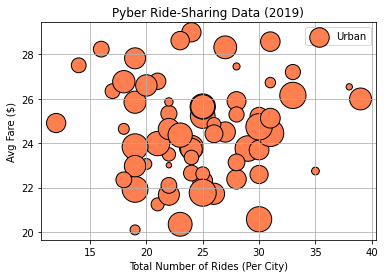

In [46]:
# Make scatter plots for each city type
# Urban
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=[value*10 for value in urban_driver_count],
            edgecolors="black",
            linewidths=1,
            color="coral",
            label="Urban")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Avg Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

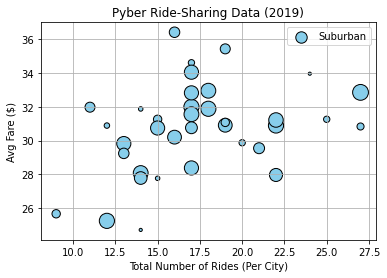

In [47]:
# Suburban
plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=[value*10 for value in suburban_driver_count],
            edgecolors="black",
            linewidths=1,
            color="skyblue",
            label="Suburban")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Avg Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

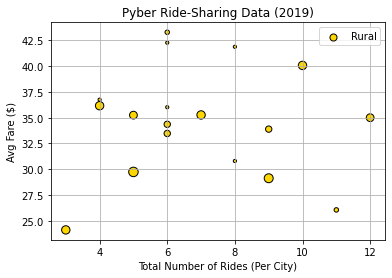

In [48]:
# Rural
plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=[value*10 for value in rural_driver_count],
            edgecolors="black",
            linewidths=1,
            color="gold",
            label="Rural")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Avg Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

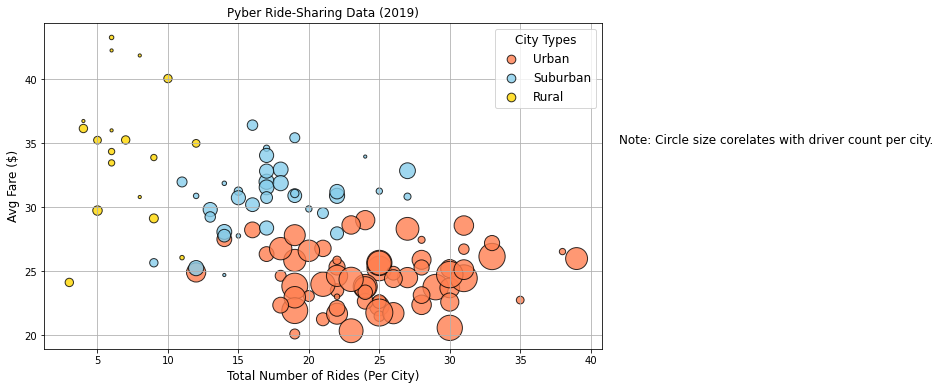

In [59]:
# Combine all the charts into one big chart - you can do that by running all of the scatters in one block of code - ?? How could you run them separately and then together outside of Jupyter notebook ?? Would you do the same thing and save each and then combine later on in the code?

plt.subplots(figsize=(10,6))
# Urban
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=[value*10 for value in urban_driver_count],
            edgecolors="black",
            linewidths=1,
            color="coral",
            alpha=0.8,
            label="Urban")

# Suburban
plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=[value*10 for value in suburban_driver_count],
            edgecolors="black",
            linewidths=1,
            color="skyblue",
            alpha=0.8,
            label="Suburban")


# Rural
plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=[value*10 for value in rural_driver_count],
            edgecolors="black",
            linewidths=1,
            color="gold",
            alpha=0.8,
            label="Rural")

# add formatting for title and axes
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Avg Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

#create and format legend
lgnd = plt.legend(fontsize="12", mode="Expanded", scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Add note on bubble size
plt.text(42, 35, "Note: Circle size corelates with driver count per city.", fontsize="12" )

# Save the chart created as a figure
plt.savefig("analysis/Fig1.png")